<a href="https://colab.research.google.com/github/arpitsharma27/CreditCard_Segmentation/blob/main/CreditCard_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# prompt: read BankChurners.csv in to python dataframe

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
# Download the file from GitHub
!wget https://raw.githubusercontent.com/arpitsharma27/CreditCard_Segmentation/main/BankChurners.csv

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('BankChurners.csv')

--2025-04-20 18:02:49--  https://raw.githubusercontent.com/arpitsharma27/CreditCard_Segmentation/main/BankChurners.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1210878 (1.2M) [text/plain]
Saving to: ‘BankChurners.csv.1’

BankChurners.csv.1  100%[===================>]   1.15M  --.-KB/s    in 0.008s  

2025-04-20 18:02:49 (143 MB/s) - ‘BankChurners.csv.1’ saved [1210878/1210878]



In [6]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [8]:
# df.value_counts('Attrition_Flag')
df.value_counts('Attrition_Flag', normalize=True)

,proportion
Attrition_Flag,
Existing Customer,0.83934
Attrited Customer,0.16066


In [9]:
df.value_counts('Gender', normalize=True)

,proportion
Gender,
F,0.529081
M,0.470919


In [10]:
def GetFrequencyCounts(columname):
  print(df.value_counts(columname, normalize=True))

In [11]:
GetFrequencyCounts('Attrition_Flag')

Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64


In [12]:
GetFrequencyCounts('Gender')

Gender
F    0.529081
M    0.470919
Name: proportion, dtype: float64


In [13]:
df.groupby('Gender')['Attrition_Flag'].value_counts()

Gender  Attrition_Flag   
F       Existing Customer    4428
        Attrited Customer     930
M       Existing Customer    4072
        Attrited Customer     697
Name: count, dtype: int64

In [14]:
pd.crosstab(index=[df['Gender'],df['Marital_Status'],df['Education_Level']], columns=df['Attrition_Flag'])

Attrition_Flag                         Attrited Customer  Existing Customer
Gender Marital_Status Education_Level                                      
F      Divorced       College                          4                 45
                      Doctorate                        5                 15
                      Graduate                        19                100
                      High School                     11                 53
                      Post-Graduate                    4                 19
                      Uneducated                      16                 62
                      Unknown                          9                 40
       Married        College                         38                201
                      Doctorate                       32                 94
                      Graduate                       131                647
                      High School                     78                402
                      Post-Graduate                   20                106
                      Uneducated                      44                298
                      Unknown                         69                291
       Single         College                         30                177
                      Doctorate                       23                 74
                      Graduate                       119                528
                      High School                     66                345
                      Post-Graduate                   17                 78
                      Uneducated                      59                262
                      Unknown                         67                280
       Unknown        College                          7                 30
                      Doctorate                        4                 10
                      Graduate                        24                102
                      High School                     17                 56
                      Post-Graduate                    3                 16
                      Uneducated                       8                 47
                      Unknown                          6                 50
M      Divorced       College                          7                 30
                      Doctorate                        3                 13
                      Graduate                        17                 89
                      High School                     11                 53
                      Post-Graduate                    4                 14
                      Uneducated                       4                 54
                      Unknown                          7                 40
       Married        College                         33                195
                      Doctorate                       14                 65
                      Graduate                        82                619
                      High School                     59                410
                      Post-Graduate                   17                100
                      Uneducated                      49                265
                      Unknown                         43                285
       Single         College                         33                146
                      Doctorate                       12                 73
                      Graduate                        83                467
                      High School                     52                319
                      Post-Graduate                   18                 76
                      Uneducated                      43                222
                      Unknown                         46                228
       Unknown        College                          2                 35
                      Doctorate                 

In [15]:
# Count grouped values
grouped = df.groupby(['Gender', 'Marital_Status', 'Education_Level', 'Attrition_Flag']).size().reset_index(name='Count')

# Plot sunburst
fig = px.sunburst(grouped,
                  path=['Gender', 'Marital_Status', 'Education_Level', 'Attrition_Flag'],
                  values='Count',
                  title='Customer Attrition Breakdown')
fig.show()


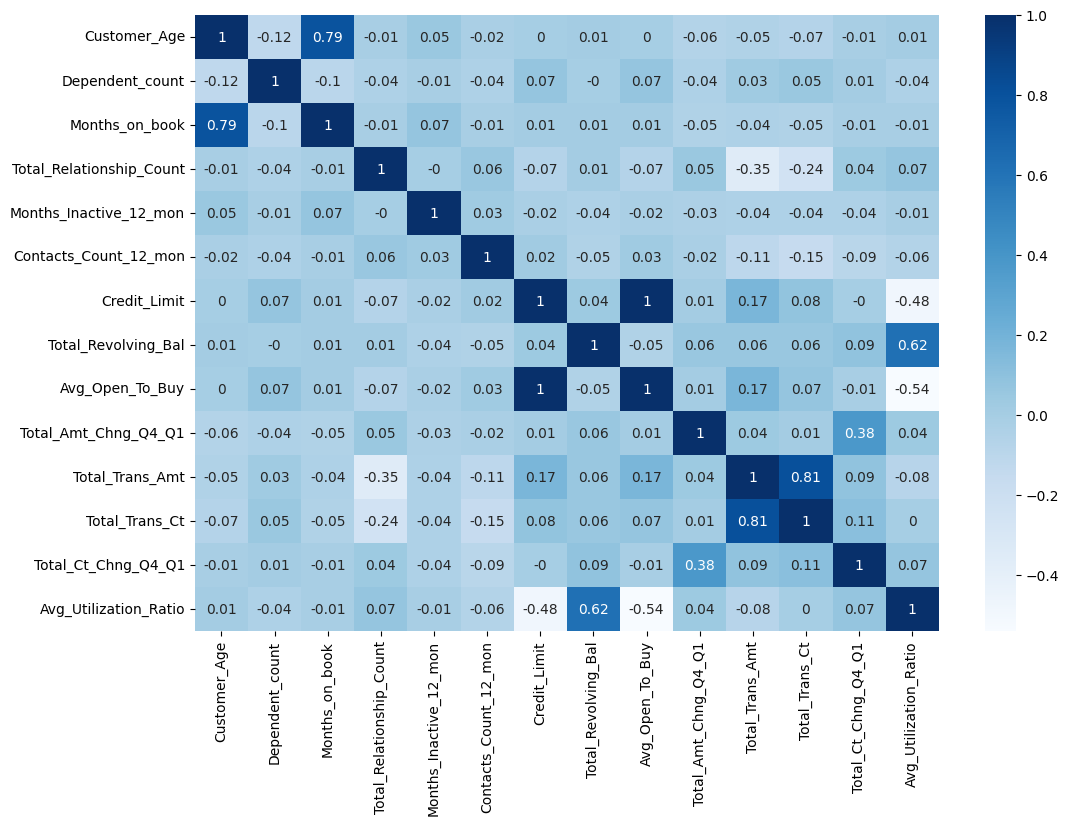

In [19]:
fig,ax= plt.subplots(figsize=(12,8))

df_corr=df.drop(['CLIENTNUM', 'Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category'],axis=1)


# corr_matrix = df.drop(['CLIENTNUM', 'Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category'], axis=1).corr().round(2)
corr_matrix = df_corr.corr().round(2)

# Plot Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Blues', ax=ax)

# plt.tight_layout()
plt.show()

This is what the Correlation Table tells us:

High correlation between

- Customer_Age and Months_on_book = 0.79
- Total_Revolving_Bal and Avg_Utilization_Ratio = 0.62
- Total_Trans_ct and Total_Trans_Amt = 0.81


https://github.com/dataquestio/solutions/blob/master/Mission745Solutions.ipynb

<ipython-input-23-d3e831a33e7b>:2: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



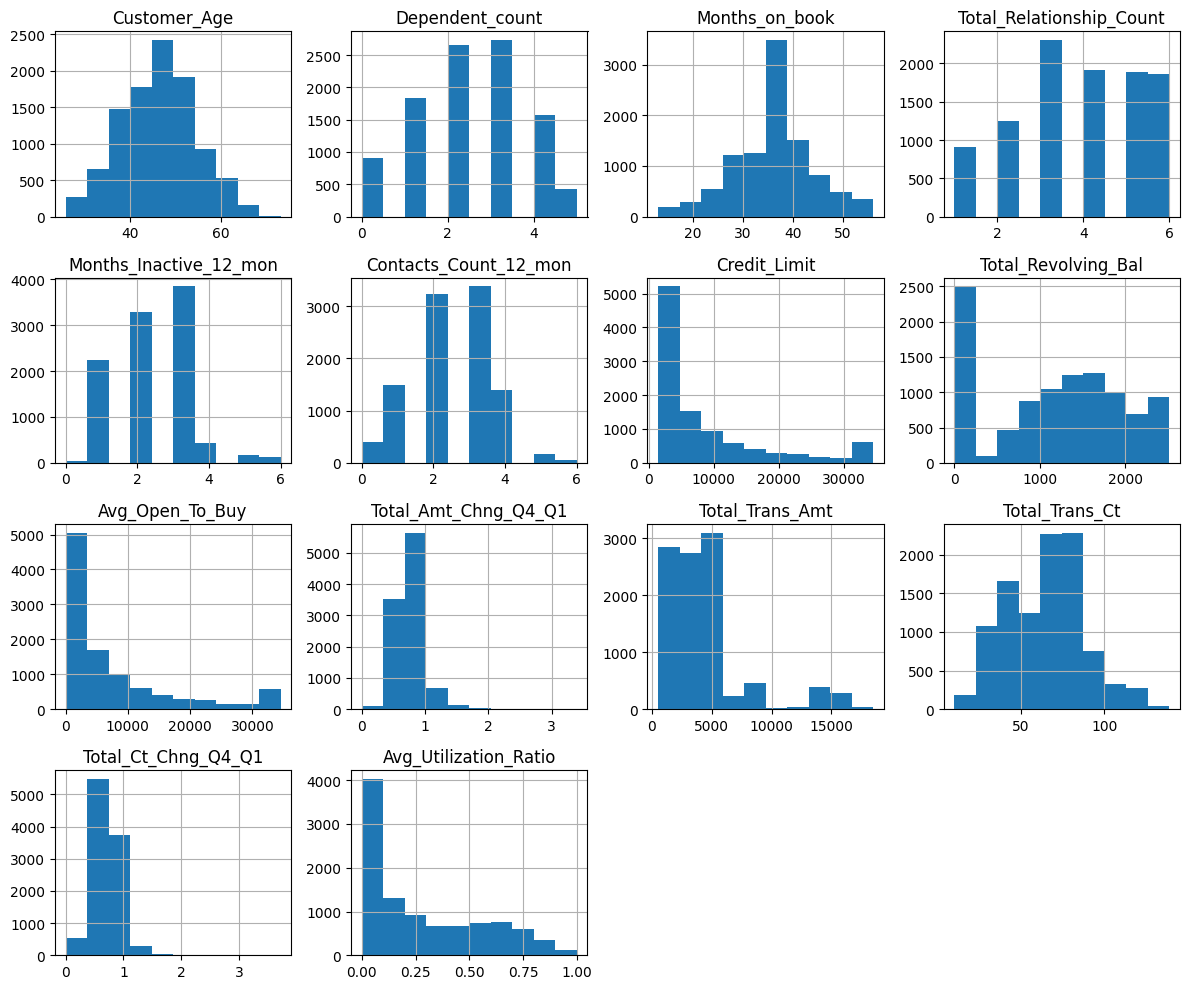

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))
df_corr.hist(ax=ax)
plt.tight_layout()
plt.show()

Except for Months_on_book and Customer_Age all are skewed. Only these two have normal distribution.

##***Feature Engineering***

We will use Lambda Function to assign numbers to categorical Columns.

`'Gender','Education_Level','Marital_Status','Income_Category','Card_Category'`

So we will get frequency on each one of them to determine what we have to code those values as.

In [31]:
print(df.value_counts('Gender'))
print(df.value_counts('Education_Level'))
print(df.value_counts('Marital_Status'))
print(df.value_counts('Income_Category'))
print(df.value_counts('Card_Category'))

Gender
F    5358
M    4769
Name: count, dtype: int64
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


In [35]:
df_feature_eng=df.copy()
df_feature_eng.replace({'Gender': {'M':1,'F':0}}, inplace=True)
df_feature_eng.head()

<ipython-input-35-896e715080c0>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,1,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,1,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,0,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [36]:
df_feature_eng.replace({'Marital_Status': {'Married':0,'Single':1,'Unknown':2,'Divorced':3}}, inplace=True)
df_feature_eng.head()

<ipython-input-36-fe9fe3cd3afb>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,1,3,High School,0,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,0,5,Graduate,1,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,1,3,Graduate,0,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,0,4,High School,2,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,1,3,Uneducated,0,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [37]:
df_feature_eng.replace({'Education_Level': {'Graduate': 0, 'High School': 1,'Unknown':2,'Uneducated':3,'College':4,'Post-Graduate':5,'Doctorate':6}}, inplace=True)
df_feature_eng.head()

<ipython-input-37-7b5a77f918de>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,1,3,1,0,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,0,5,0,1,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,1,3,0,0,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,0,4,1,2,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,1,3,3,0,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [38]:
df_feature_eng.replace({'Income_Category': {'Less than $40K': 0, '$40K - $60K': 1,'$80K - $120K':3,'$60K - $80K':2,'$120K +':4,'Unknown':5}}, inplace=True)
df_feature_eng.head()

<ipython-input-38-3e34e36195a9>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,1,3,1,0,2,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,0,5,0,1,0,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,1,3,0,0,3,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,0,4,1,2,0,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,1,3,3,0,2,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [39]:
df_feature_eng.replace({'Card_Category': {'Blue': 0, 'Silver': 1,'Gold':2,'Platinum':3}}, inplace=True)
df_feature_eng.head()

<ipython-input-39-8ba2fe022af8>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,1,3,1,0,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,0,5,0,1,0,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,1,3,0,0,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,0,4,1,2,0,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,1,3,3,0,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
